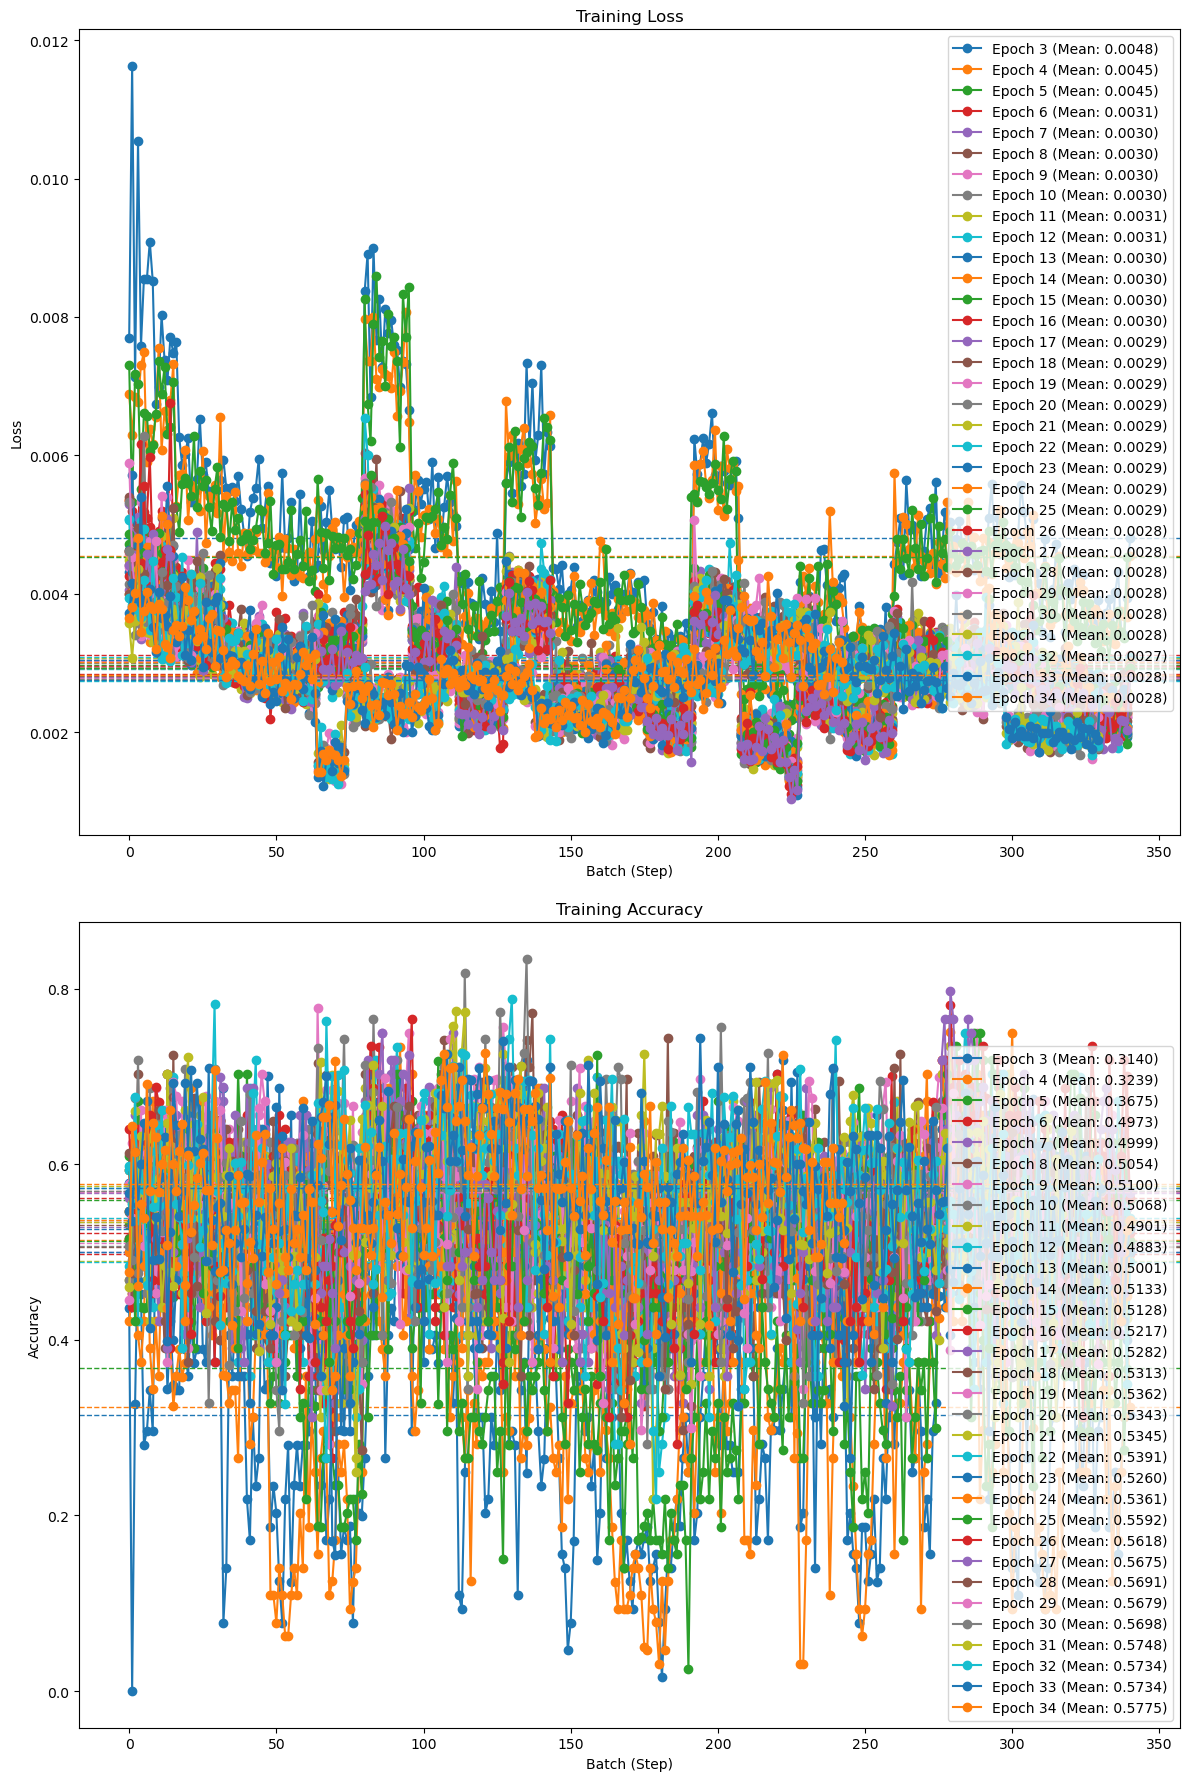

In [43]:
import matplotlib.pyplot as plt
import itertools

# Function to read log data and plot metrics with average values in the legend
def plot_training_metrics_with_mean_in_legend(log_file_path, start_line=1):
    epoch_data = []  # Store lists of (loss, accuracy) for each epoch
    current_epoch_losses = []
    current_epoch_accuracies = []

    # Read the log file starting from the specified line
    with open(log_file_path, 'r') as f:
        lines = f.readlines()[start_line - 1:]

        for line in lines:
            if "Epoch" in line:
                # Start a new epoch
                if current_epoch_losses and current_epoch_accuracies:
                    epoch_data.append((current_epoch_losses, current_epoch_accuracies))
                    current_epoch_losses = []
                    current_epoch_accuracies = []
            elif "Training Loss" in line and "Training Accuracy" in line:
                # Extract loss and accuracy for the current batch
                parts = line.split("Training Loss: ")[1].split(", Training Accuracy: ")
                loss = float(parts[0])
                accuracy = float(parts[1])

                current_epoch_losses.append(loss)
                current_epoch_accuracies.append(accuracy)

        # Append the final epoch data
        if current_epoch_losses and current_epoch_accuracies:
            epoch_data.append((current_epoch_losses, current_epoch_accuracies))

    # Define color cycle for epochs
    colors = itertools.cycle(plt.cm.tab10.colors)

    # Create figure and two vertically stacked subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 18))

    # Plot Training Loss for all epochs
    for i, (losses, _) in enumerate(epoch_data):
        color = next(colors)
        mean_loss = sum(losses) / len(losses)
        ax1.plot(losses, marker='o', label=f'Epoch {i + 3} (Mean: {mean_loss:.4f})', color=color)
        ax1.axhline(y=mean_loss, color=color, linestyle='--', linewidth=1)

    ax1.set_title("Training Loss")
    ax1.set_xlabel("Batch (Step)")
    ax1.set_ylabel("Loss")
    ax1.legend()

    # Reset color cycle for accuracy plot
    colors = itertools.cycle(plt.cm.tab10.colors)

    # Plot Training Accuracy for all epochs
    for i, (_, accuracies) in enumerate(epoch_data):
        color = next(colors)
        mean_accuracy = sum(accuracies) / len(accuracies)
        ax2.plot(accuracies, marker='o', label=f'Epoch {i + 3} (Mean: {mean_accuracy:.4f})', color=color)
        ax2.axhline(y=mean_accuracy, color=color, linestyle='--', linewidth=1)

    ax2.set_title("Training Accuracy")
    ax2.set_xlabel("Batch (Step)")
    ax2.set_ylabel("Accuracy")
    ax2.legend()

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

# File path to the log file (for demonstration, adjust path if needed)
log_file_path = r"C:\Users\Lenovo\OneDrive\NUS\CS-24fall\project\AudiobookGeneration_cs5647\training_log.txt"

# Run the function to plot metrics with mean values in the legend
plot_training_metrics_with_mean_in_legend(log_file_path)


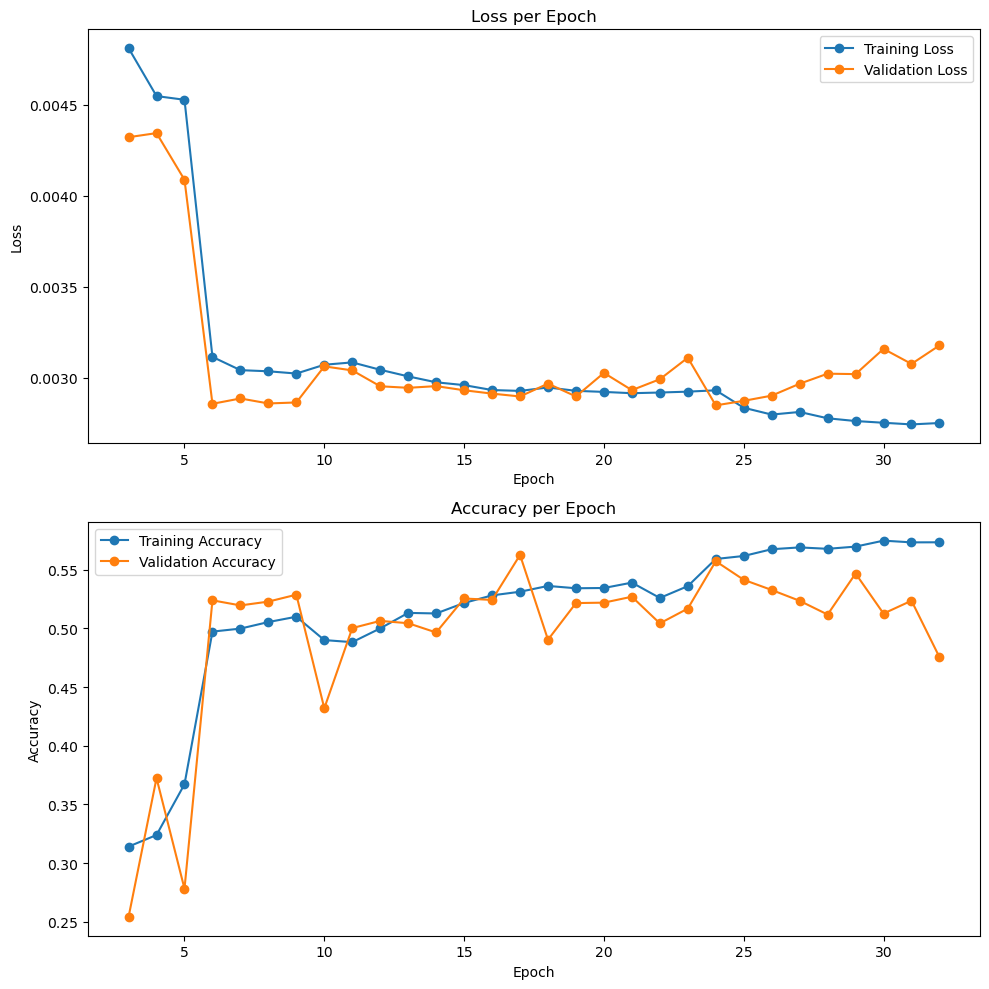

In [44]:
import matplotlib.pyplot as plt

def plot_training_and_validation_metrics(log_file_path):
    epoch_data = {}  # Store {epoch: (train_loss, train_accuracy, val_loss, val_accuracy)}

    # Read the log file
    with open(log_file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        if "EPOCH " in line:
            # Extract epoch number
            epoch = int(line.split("EPOCH ")[1].split(":")[0])

            # Extract and store Training Loss and Accuracy
            if "Training Loss" in line and "Training Accuracy" in line:
                parts = line.split("Training Loss: ")[1].split(", Training Accuracy: ")
                train_loss = float(parts[0])
                train_accuracy = float(parts[1])

                # Initialize or update the epoch's training data
                if epoch not in epoch_data:
                    epoch_data[epoch] = [train_loss, train_accuracy, None, None]
                else:
                    epoch_data[epoch][0] = train_loss  # Update train_loss
                    epoch_data[epoch][1] = train_accuracy  # Update train_accuracy

            # Extract and store Validation Loss and Accuracy
            elif "Validation Loss" in line and "Validation Accuracy" in line:
                parts = line.split("Validation Loss: ")[1].split(", Validation Accuracy: ")
                val_loss = float(parts[0])
                val_accuracy = float(parts[1])

                # Initialize or update the epoch's validation data
                if epoch not in epoch_data:
                    epoch_data[epoch] = [None, None, val_loss, val_accuracy]
                else:
                    epoch_data[epoch][2] = val_loss  # Update val_loss
                    epoch_data[epoch][3] = val_accuracy  # Update val_accuracy

    # Extract sorted metrics by epoch
    epochs = sorted(epoch_data.keys())
    train_losses = [epoch_data[epoch][0] for epoch in epochs]
    train_accuracies = [epoch_data[epoch][1] for epoch in epochs]
    val_losses = [epoch_data[epoch][2] for epoch in epochs]
    val_accuracies = [epoch_data[epoch][3] for epoch in epochs]

    # Plot Training and Validation Metrics
    plt.figure(figsize=(10, 10))

    # Plot Loss
    plt.subplot(2, 1, 1)
    plt.plot(epochs, train_losses, marker='o', label='Training Loss')
    plt.plot(epochs, val_losses, marker='o', label='Validation Loss')
    plt.title("Loss per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(2, 1, 2)
    plt.plot(epochs, train_accuracies, marker='o', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, marker='o', label='Validation Accuracy')
    plt.title("Accuracy per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

# File path to the log file (adjust path if needed)
log_file_path = r"C:\Users\Lenovo\OneDrive\NUS\CS-24fall\project\AudiobookGeneration_cs5647\training_log.txt"

# Run the function to plot metrics
plot_training_and_validation_metrics(log_file_path)


In [ ]:
from transformers import BertModel

# 指定模型保存路径
save_path = "/bert-base-cased"

# 下载并保存模型权重
model = BertModel.from_pretrained("bert-base-cased")
model.save_pretrained(save_path)

print(f"Model saved to {save_path}")
